In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format='retina'

In [13]:
deprob = '20'
simulation = '1000_8'
group = '3'

no_celltypes = int(simulation.split("_")[-1])

home = f'/home/cellatlas/tech-paper/simdata/splatter_simulations/one_out_matrices/{simulation}_{deprob}_group{group}'



Include number of cells assigned to group 3

In [20]:
ground_truth = pd.read_csv(f'{home}/labels.txt', sep = '\t', header = None)        
ground_truth_values = ground_truth[0].values
#Conver to lowercase
ground_truth = [g.lower() for g in ground_truth_values]

accuracies = []
assignments_ca = {}  
assignments_mx = {}
for i in range(0,15):
    n_dropped = i
    data = f'{home}/{n_dropped}_dropped/'

    ca_results = [n_dropped]
    mx_results = [n_dropped]



    # Read cellassign
    try:
        cellassign = pd.read_csv(f'{data}/ca/other/ca_predictions.csv')
        cellassign_values = cellassign.iloc[:,1:].idxmax(axis=1)

    # Read mx
        mx_values = pd.read_csv(f'{data}/mx/other/rank/assignments.txt', sep = '\t')['label'].values
        ca_results.extend(['ca', round(np.sum(cellassign_values == ground_truth) / len(cellassign_values) * 100), len([a for a,g in zip(ground_truth, cellassign_values) if g == 'group3' ])])
        mx_results.extend(['mx', round(np.sum(mx_values == ground_truth) / len(mx_values) * 100), len([a for a,g in zip(ground_truth, mx_values) if g == 'group3' ])])

        #print(simulation + "\n \t Cellassign: " + str(round(np.sum(cellassign_values == ground_truth) / len(cellassign_values) * 100)) + "%"
             #+ "\n \t mx: " + str(round(np.sum(mx_values == ground_truth) / len(mx_values) * 100)) + "%")

        accuracies.append(ca_results)
        accuracies.append(mx_results)
        assignments_ca[n_dropped] = cellassign_values.values
        assignments_mx[n_dropped] = mx_values
    except:
        pass

In [21]:
accuracies_df = pd.DataFrame(accuracies)
accuracies_df['accuracy_group3'] = (accuracies_df[3] / 115) * 100

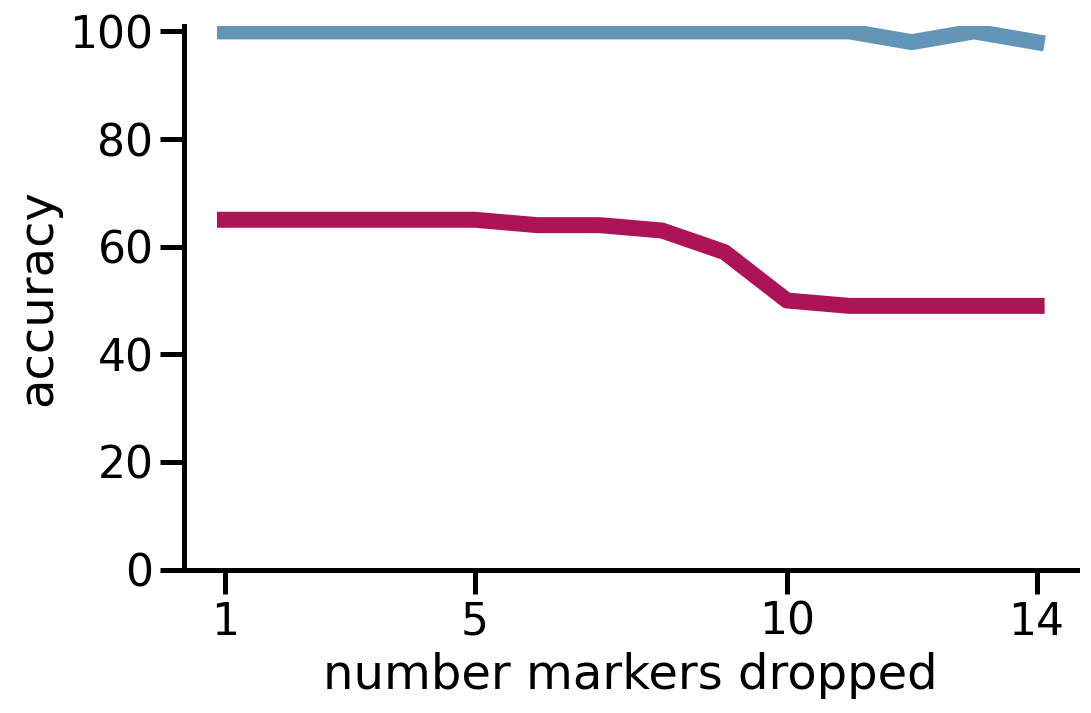

In [22]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (8,5))
sns.lineplot(data = pd.DataFrame(accuracies), x = 0, y = 2, hue = 1, palette = ["#AD1457", '#6395B6'], linewidth=8)
ax.set_ylabel('accuracy')
ax.set_xlabel('number markers dropped')
ax.get_legend().remove()
ax.set_xticks([1, 5, 10, 14])
ax.set_ylim(0,101)
sns.despine()
# plt.savefig('control.pdf')

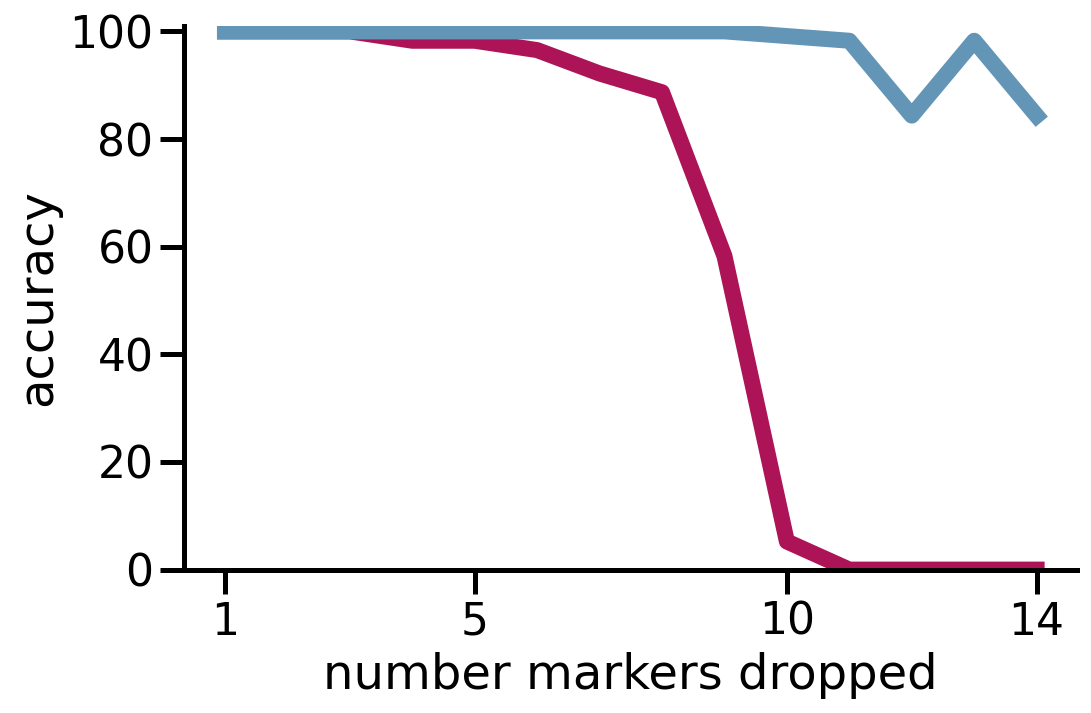

In [23]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (8,5))
sns.lineplot(data = accuracies_df, x = 0, y = 'accuracy_group3', hue = 1, palette = ["#AD1457", '#6395B6'], linewidth=8)
ax.set_ylabel('accuracy')
ax.set_xlabel('number markers dropped')
ax.get_legend().remove()
ax.set_xticks([1, 5, 10, 14])
ax.set_ylim(0,101)
sns.despine()
# plt.savefig('group3_control.pdf')

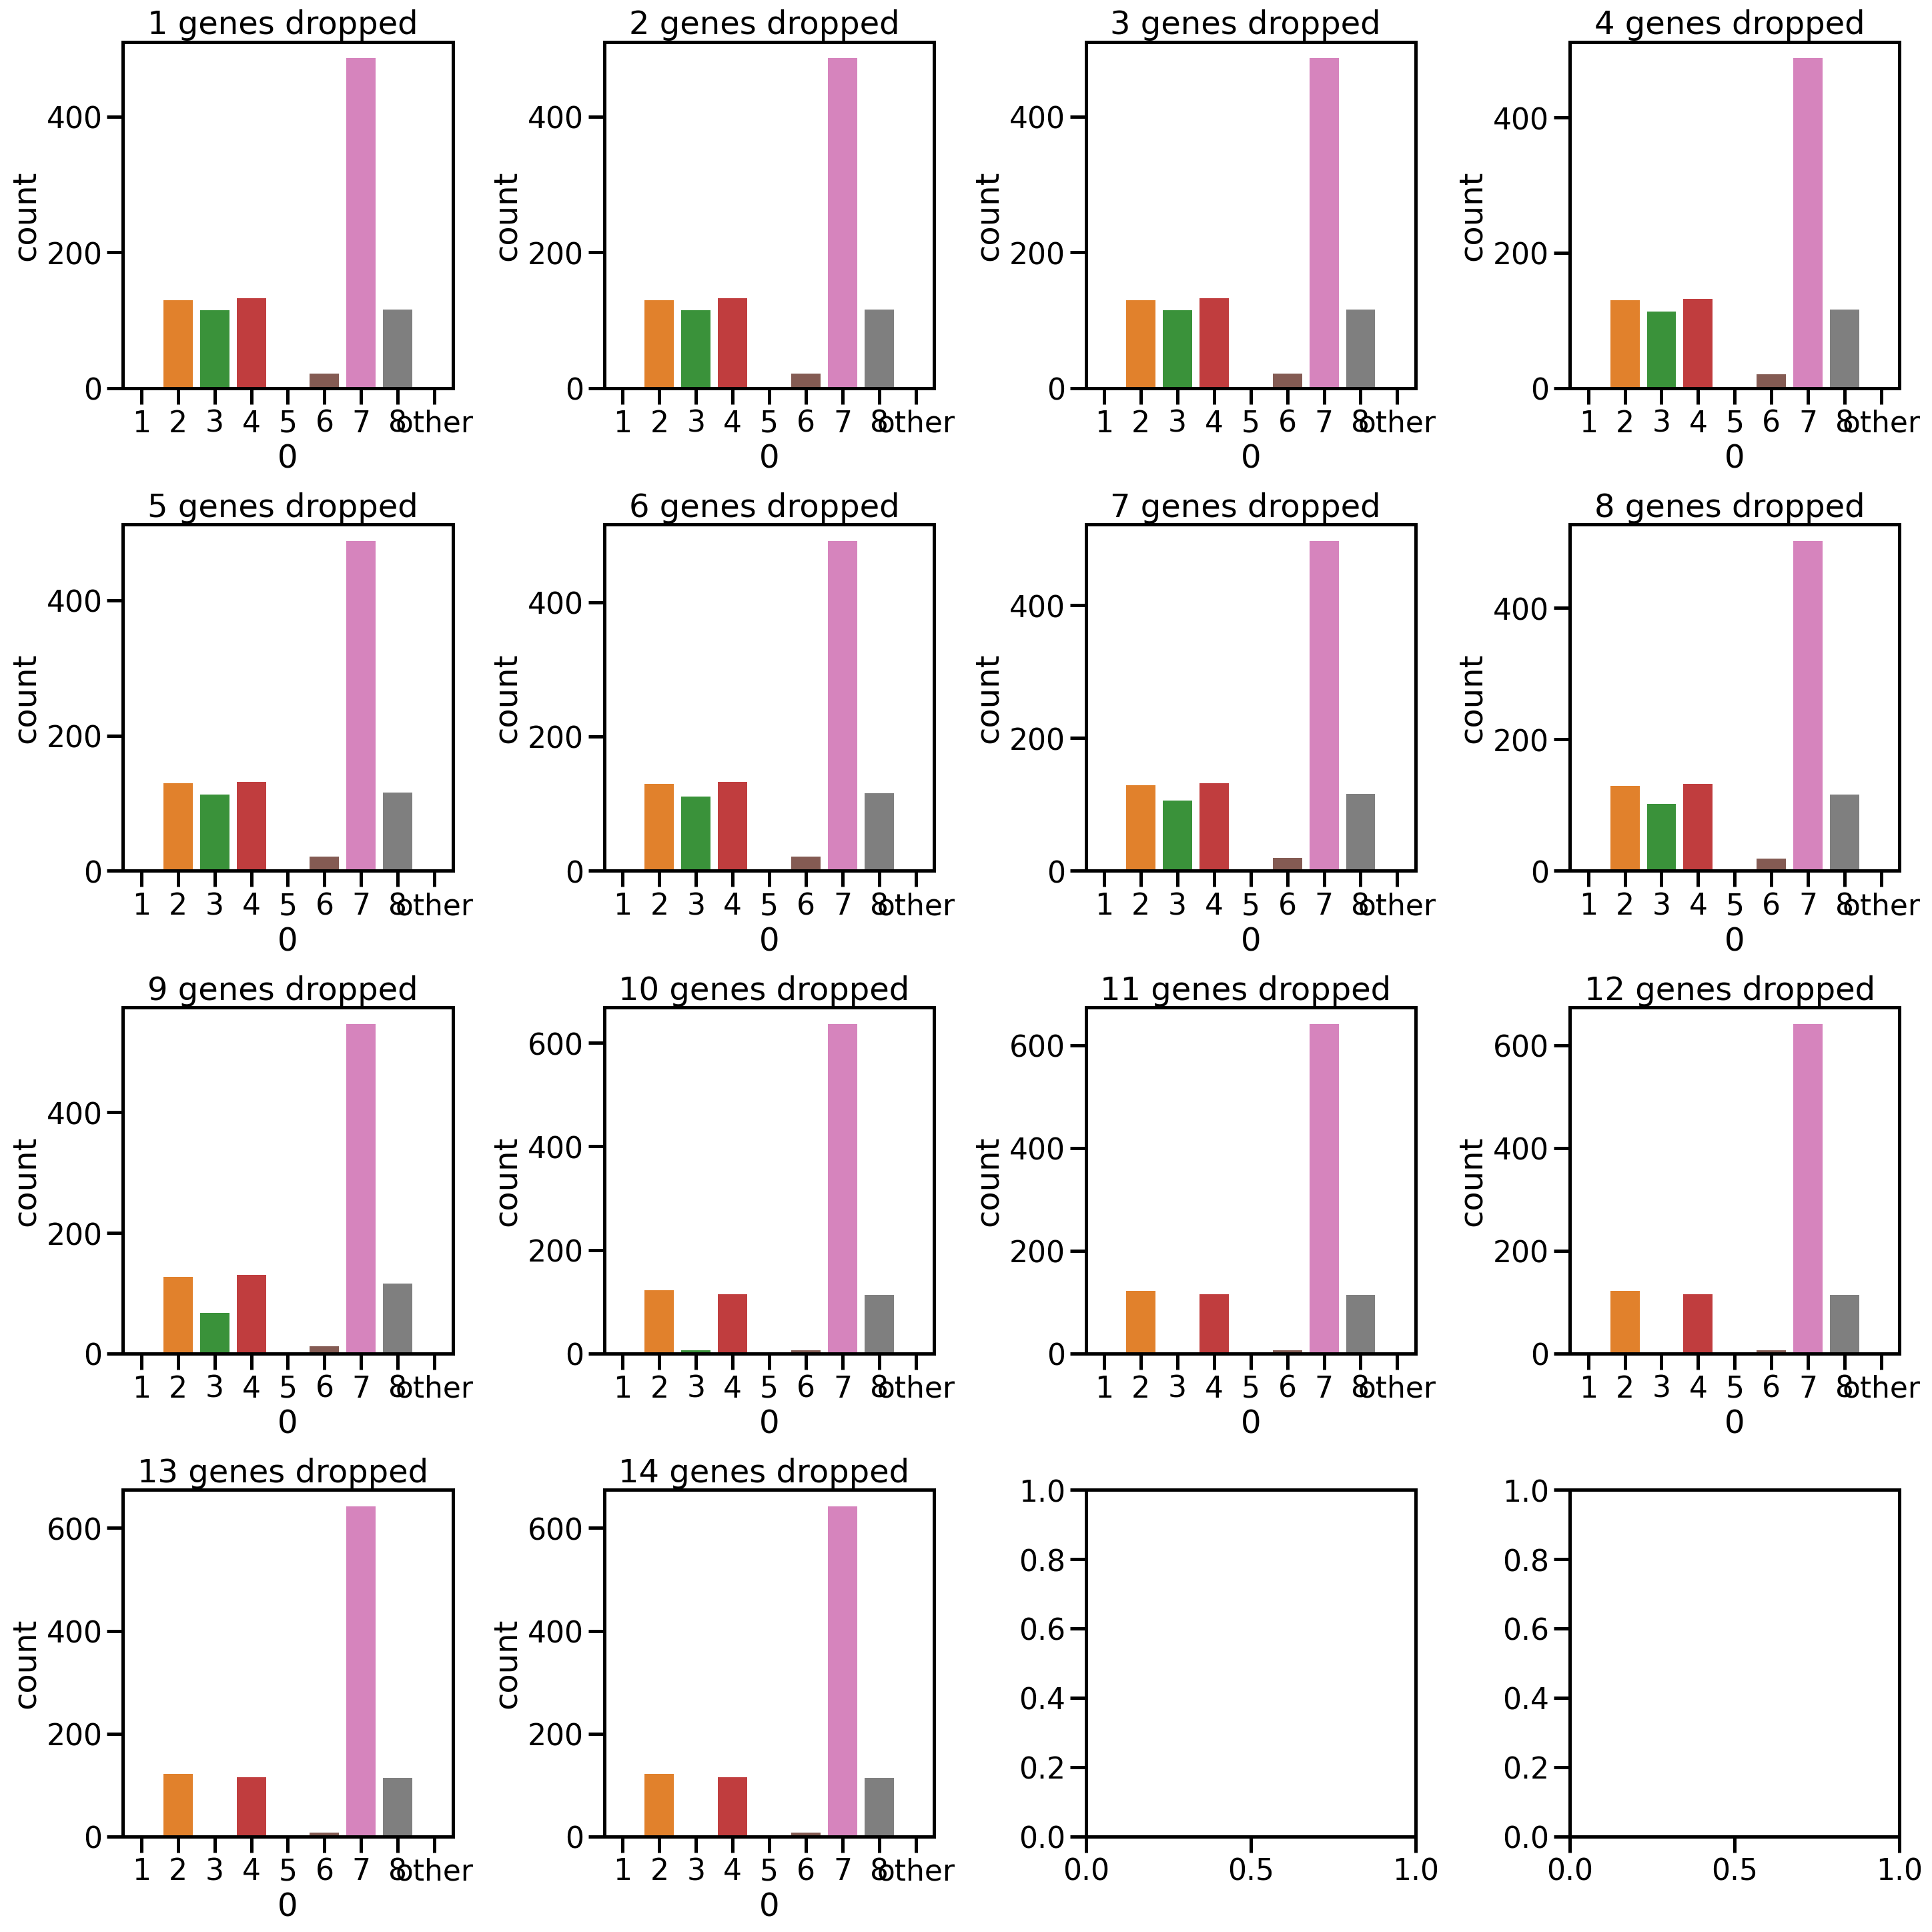

In [24]:
method = 'ca'


fig, ax = plt.subplots(4,4, figsize = (20, 20), constrained_layout=True)
for i, axis in zip(range(1, 15), ax.flatten()):
    if method == 'ca':
        df = pd.DataFrame(assignments_ca[i], ground_truth)
    #df_ca = df_ca[df_ca.index == 'group1']
    elif method == 'mx':
        df = pd.DataFrame(assignments_mx[i], ground_truth)
    order = [f'group{i+1}' for i in range(int(no_celltypes))]
    order.append('other')
    sns.countplot(df[0], order = order, ax= axis)
    axis.set_title(f'{i} genes dropped ')
    labels = [f'{i+1}' for i in range(int(no_celltypes))]
    labels.append('other')
    axis.set_xticklabels(labels)


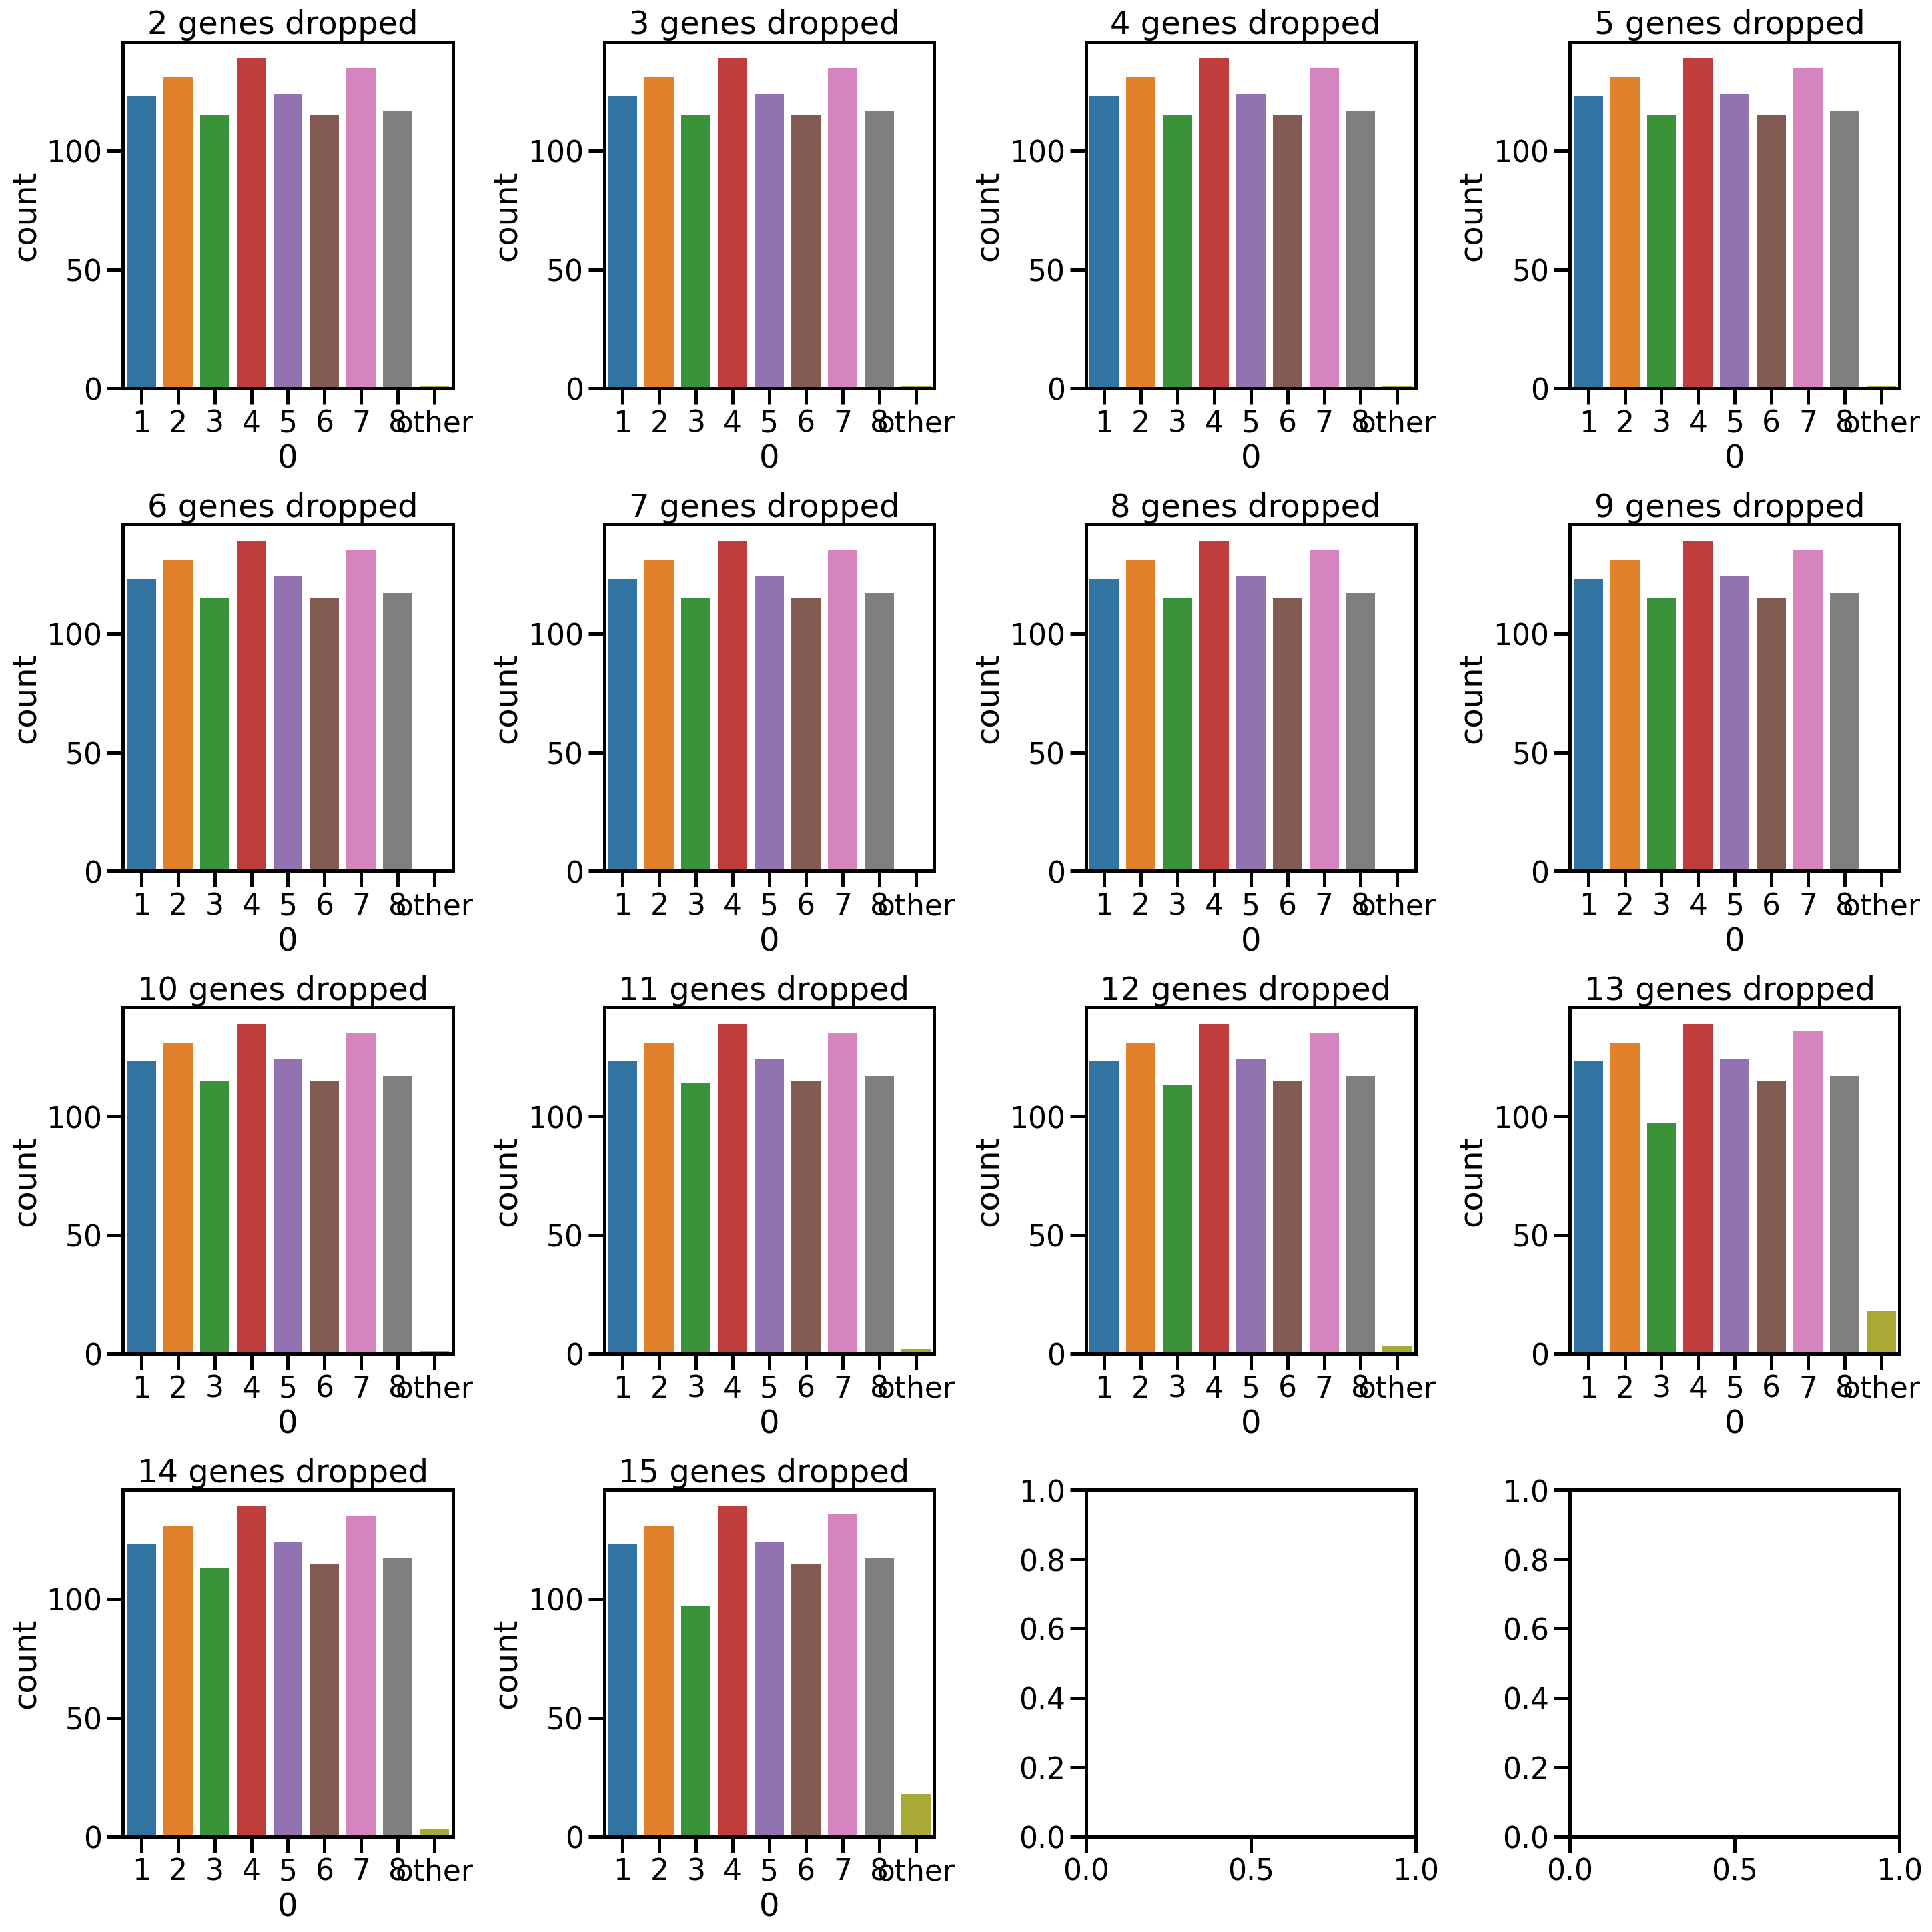

In [25]:
method = 'mx'


fig, ax = plt.subplots(4,4, figsize = (20, 20), constrained_layout=True)
for i, axis in zip(range(1, 15), ax.flatten()):
    if method == 'ca':
        df = pd.DataFrame(assignments_ca[i], ground_truth)
    #df_ca = df_ca[df_ca.index == 'group1']
    elif method == 'mx':
        df = pd.DataFrame(assignments_mx[i], ground_truth)
    order = [f'group{i+1}' for i in range(int(no_celltypes))]
    order.append('other')
    sns.countplot(df[0], order = order, ax= axis)
    axis.set_title(f'{i+1} genes dropped ')
    labels = [f'{i+1}' for i in range(int(no_celltypes))]
    labels.append('other')
    axis.set_xticklabels(labels)

In [27]:
no_markers_list = [1, 3, 5, 7, 9, 11, 13, 15]

results = []

[1, 3, 5, 7, 9, 11, 13, 15]

In [28]:
results = []

#for de in [1, 5, 10, 20, 50]:
for de in [1, 2,3, 5, 10, 20]:
    home = f'/home/cellatlas/tech-paper/simdata/splatter_simulations/vanilla_splatter/deprob_{de}'
    
    simulations_list = os.listdir(home)
    # Clean simulations
    simulations_list = [s for s in simulations_list if s not in ['.Rhistory', '.DS_Store', 'splatter.R', f'run_splatter_deprob_{deprob}.R', 'runmx.sh']]
    for simulation in simulations_list:
        sim = [int(x) for x in simulation.split('_')]


        #####
        sim.append(de)
        ######
        # Read groundtruth
        ground_truth = pd.read_csv(f'{home}/{simulation}/labels.txt', sep = '\t', header = None)
        ground_truth_values = ground_truth[0].values
        # Conver to lowercase
        ground_truth = [g.lower() for g in ground_truth_values]
        for no_markers in no_markers_list:
            sim_mk_ca = sim.copy()
            sim_mk_mx = sim.copy()

            
            sim_mk_ca.extend([no_markers])
            sim_mk_mx.extend([no_markers])

            # Read cellassign
            try:
                cellassign = pd.read_csv(f'{home}/{simulation}/{no_markers}/ca/ca_predictions.csv')
                cellassign_values = cellassign.iloc[:,1:].idxmax(axis=1)

            # Read mx
                mx_values = pd.read_csv(f'{home}/{simulation}/{no_markers}/mx/assignments.txt', sep = '\t')['label'].values
                sim_mk_ca.extend(['ca', round(np.sum(cellassign_values == ground_truth) / len(cellassign_values) * 100)])
                sim_mk_mx.extend(['mx', round(np.sum(mx_values == ground_truth) / len(mx_values) * 100)])
                
                #print(simulation + "\n \t Cellassign: " + str(round(np.sum(cellassign_values == ground_truth) / len(cellassign_values) * 100)) + "%"
                     #+ "\n \t mx: " + str(round(np.sum(mx_values == ground_truth) / len(mx_values) * 100)) + "%")

                results.append(sim_mk_ca)
                results.append(sim_mk_mx)
            except:
                pass

In [29]:
results_df = pd.DataFrame(results)
results_df
results_df.columns = ['no_cells', 'no_celltypes', 'deprob', 'no_markers', 'assignment', 'accuracy']

# results_df.to_csv("/home/cellatlas/simdata/splatter_simulations/assignments_table.csv")

results_df

,no_cells,no_celltypes,deprob,no_markers,assignment,accuracy
0,2000,2,1,1,ca,51
1,2000,2,1,1,mx,51
2,2000,2,1,3,ca,51
3,2000,2,1,3,mx,51
4,2000,2,1,5,ca,51
...,...,...,...,...,...,...
1531,4000,8,20,11,mx,100
1532,4000,8,20,13,ca,12
1533,4000,8,20,13,mx,100
1534,4000,8,20,15,ca,12


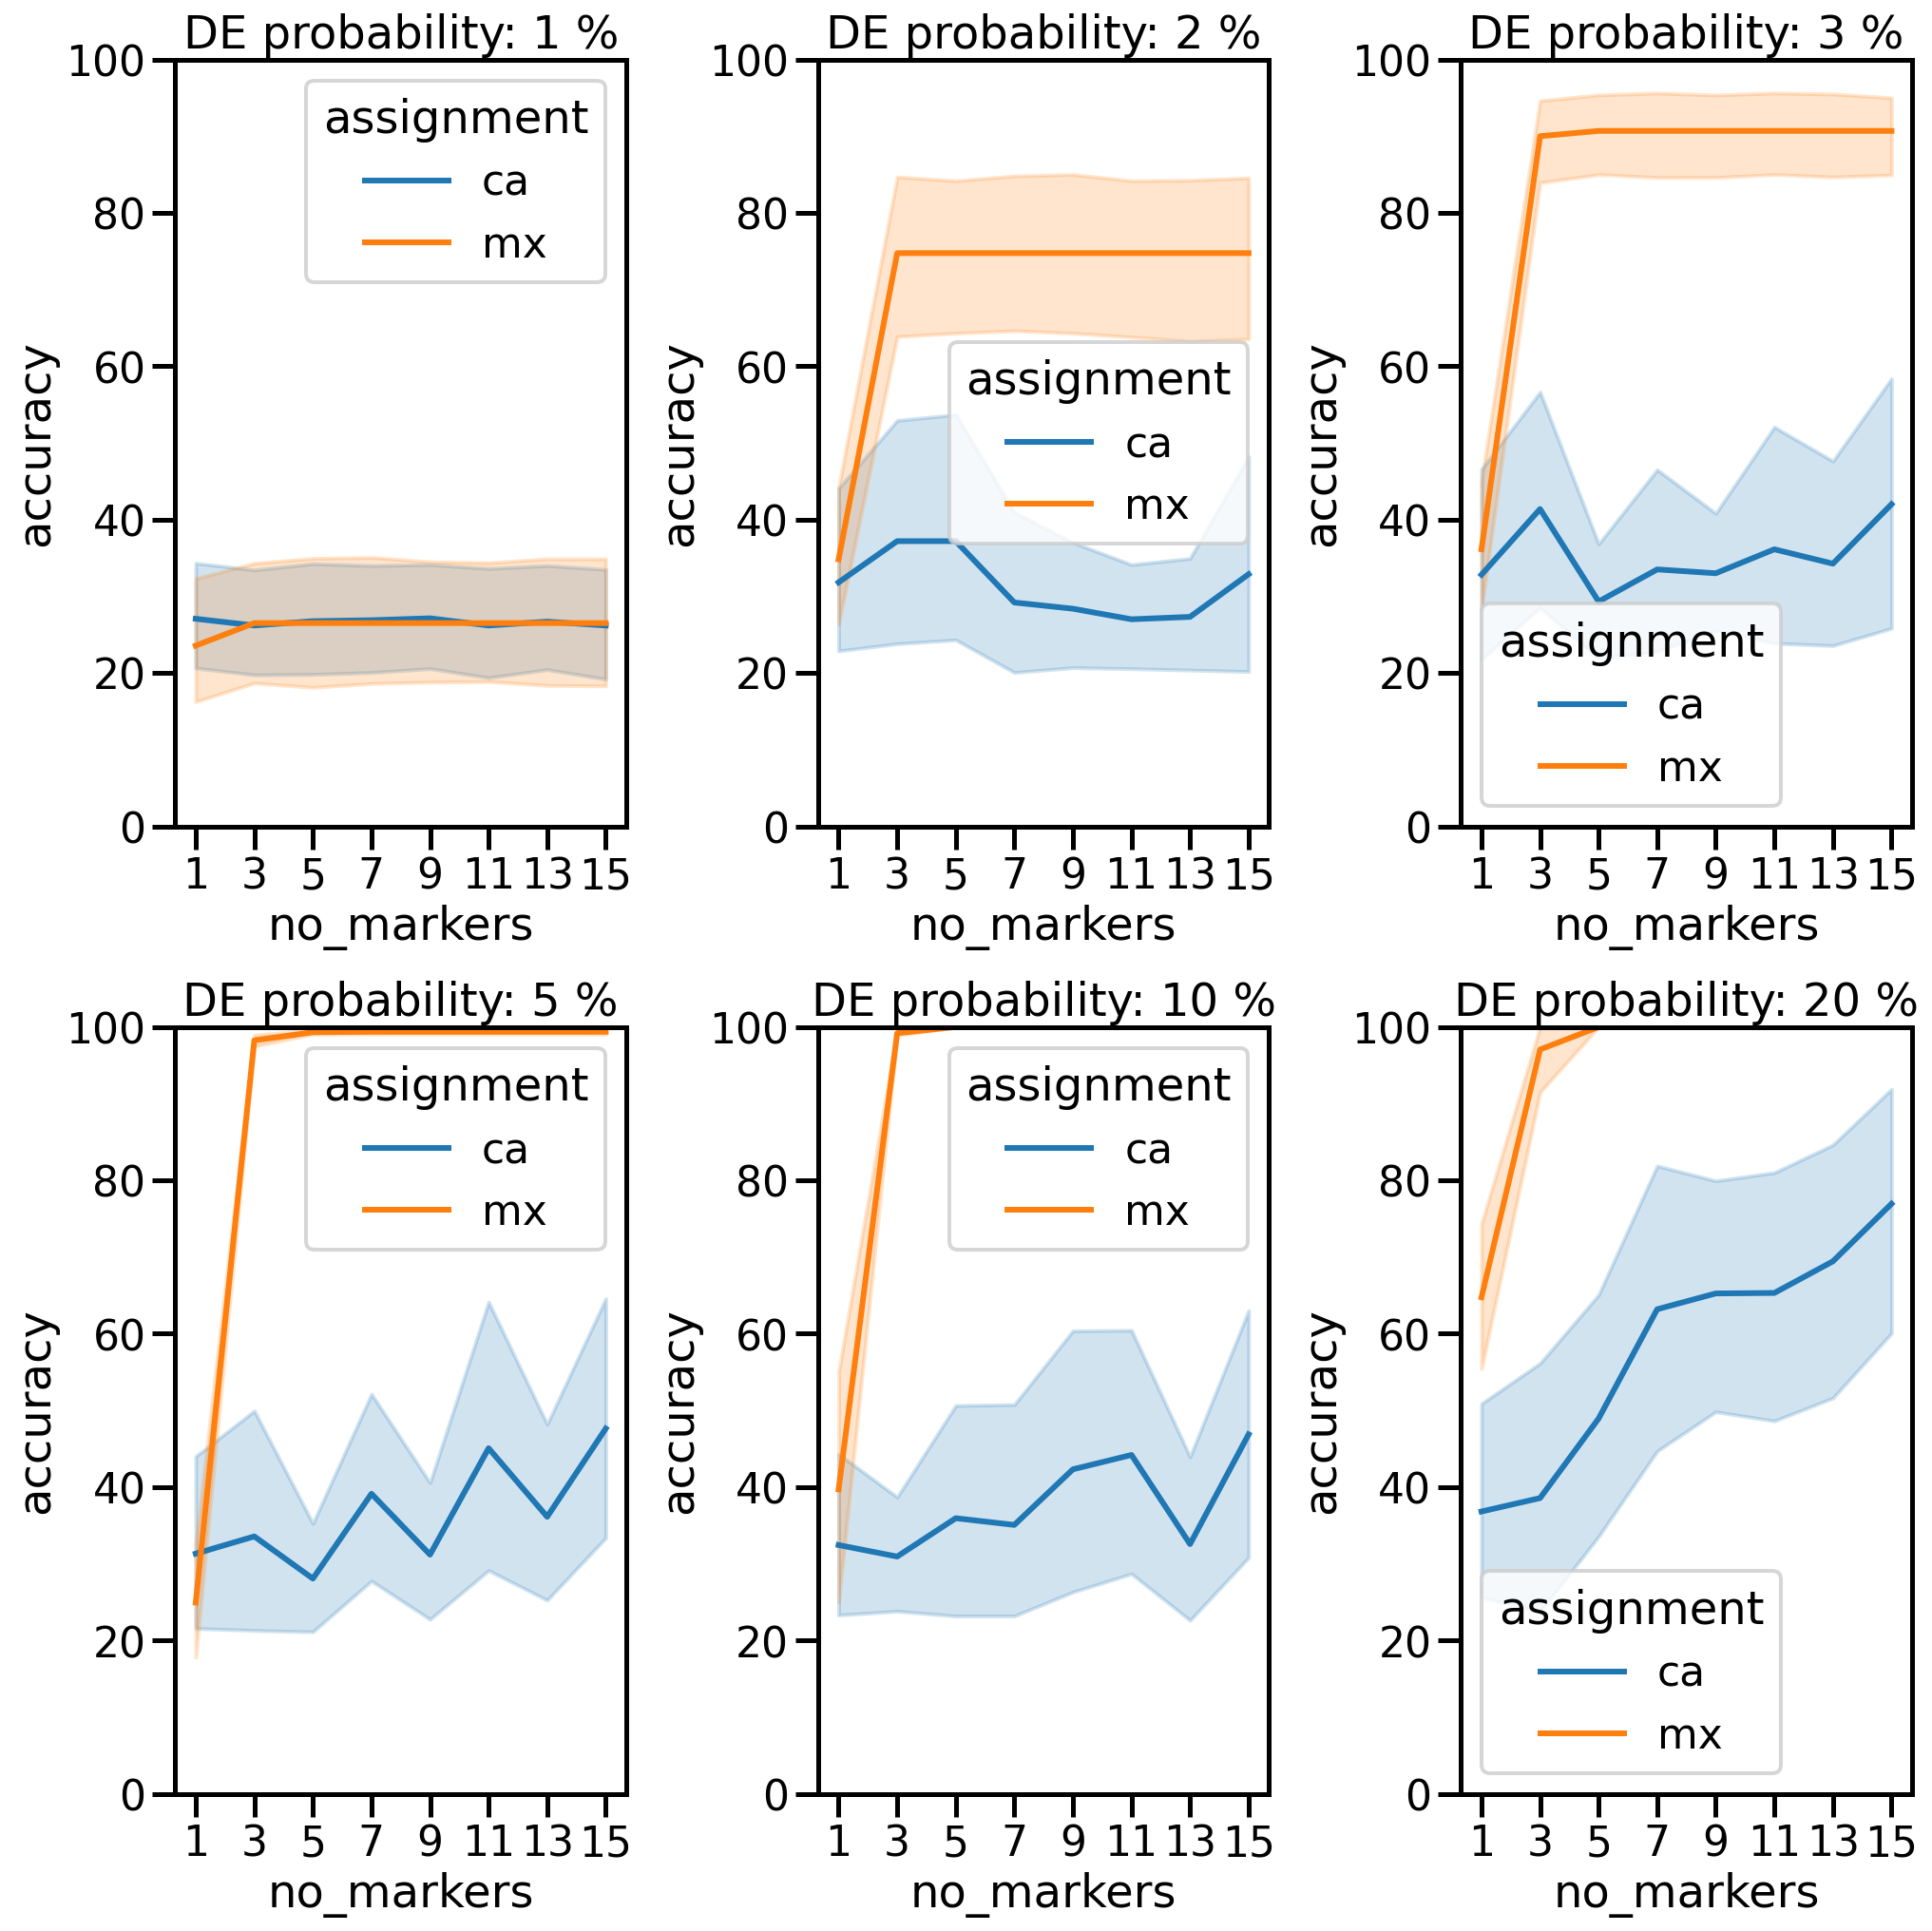

In [30]:
fig, ax = plt.subplots(2, 3, figsize = (14,14), constrained_layout=True)
#for de, axis in zip([1,5, 10, 20, 50], ax.flatten()):
for de, axis in zip([1, 2, 3, 5, 10, 20], ax.flatten()):
    sns.lineplot(data = results_df.query('deprob ==@de'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis)
    axis.set_title(f'DE probability: {de} %')
    axis.set_ylim(0, 100)
    axis.set_xticks(no_markers_list)